In [3]:
import os

import cv2
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [2]:
paths = [r'D:\by_class\30\train_30',
         r"D:\by_class\31\train_31",
         r"D:\by_class\32\train_32",
         r"D:\by_class\33\train_33",
         r"D:\by_class\34\train_34",
         r"D:\by_class\35\train_35",
         r"D:\by_class\36\train_36",
         r"D:\by_class\37\train_37",
         r"D:\by_class\38\train_38",
         r"D:\by_class\39\train_39"]

In [3]:
images = []
labels = []

for path in paths:
    for imgs in os.listdir(path):
        images.append(cv2.imread(path+f"\\{imgs}", cv2.IMREAD_GRAYSCALE))
        labels.append(float(path[-1]))

images = np.array(images)
labels = np.array(labels)

In [4]:
print(images.shape)
print(labels.shape)

(344307, 128, 128)
(344307,)


In [5]:
# Shuffling
np.random.seed(42)
idx = np.random.permutation(len(labels))
images = images[idx]
labels = labels[idx]

In [6]:
images[200].shape

(128, 128)

In [7]:
# Getting half the data
images = images[:len(images)//2]
labels = labels[:len(labels)//2]

In [8]:
wigth, height = np.unique(labels, return_counts=True)

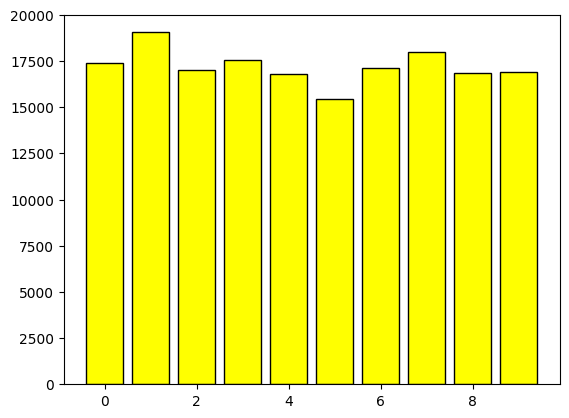

In [9]:
plt.bar(wigth,height, edgecolor='black', color='yellow')
plt.show()

(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

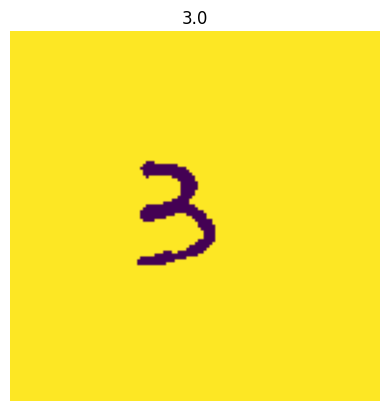

In [10]:
plt.imshow(images[101112])
plt.title(labels[101112])
plt.axis('off')

## Model Training

In [11]:
images = np.expand_dims(images, axis=-1)
images.shape

(172153, 128, 128, 1)

In [12]:
labels.shape

(172153,)

In [13]:
# normalization and train test split
X_train, X_test, y_train, y_test  = train_test_split(images.astype(np.float32)/255, labels.astype(np.float32), 
                                                     test_size=0.01, shuffle=True, stratify=labels, random_state=42)

In [14]:
X_train.shape

(170431, 128, 128, 1)

In [15]:
y_train.shape

(170431,)

In [16]:
type(X_train[0][0][0][0])

numpy.float32

In [18]:
model = keras.Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1) ,padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),

    Dense(units=128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.02)),
    Dense(units=10, activation='softmax')
])

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=3, validation_split=0.2)

c:\Users\HP\Desktop\project\Hand_digits\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
4261/4261 ━━━━━━━━━━━━━━━━━━━━ 1243s 291ms/step - accuracy: 0.9219 - loss: 0.4897 - val_accuracy: 0.9837 - val_loss: 0.1746
Epoch 2/3
4261/4261 ━━━━━━━━━━━━━━━━━━━━ 1198s 281ms/step - accuracy: 0.9812 - loss: 0.1645 - val_accuracy: 0.9840 - val_loss: 0.1329
Epoch 3/3
4261/4261 ━━━━━━━━━━━━━━━━━━━━ 1186s 278ms/step - accuracy: 0.9845 - loss: 0.1360 - val_accuracy: 0.9894 - val_loss: 0.1066


In [18]:
# loading model that is trained above
model = keras.models.load_model(r'../Models/digits_classifier.keras')

In [22]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'loss = {(loss*100):.2f}%')
print(f'accuracy = {(accuracy*100):.2f}%')

54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9869 - loss: 0.1156
loss = 11.51%
accuracy = 98.72%


In [ ]:
y_pred = model.predict(X_test)
y_pred = np.array([int(i.argmax()) for i in y_pred])
print(classification_report(y_test ,y_pred))

NameError: name 'X_test' is not defined

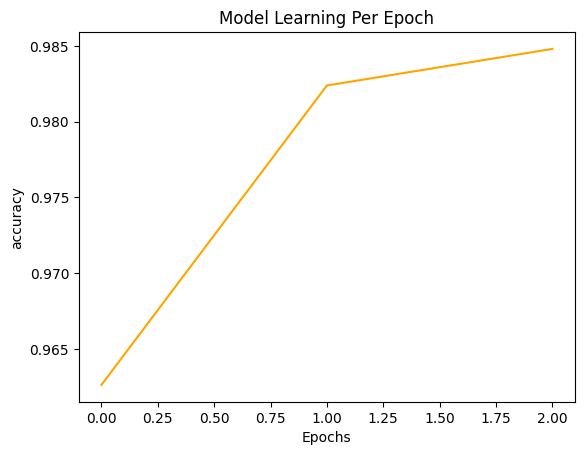

In [84]:
plt.plot(history.epoch, history.history['accuracy'], color='orange')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Model Learning Per Epoch')
plt.show()

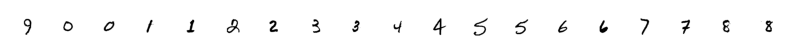

In [14]:
from glob import glob

pp_imgs = glob(r'..\New folder\*')

imgs = []
for img in pp_imgs:
    img =cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    # Binarize and invert (threshold + inversion)
    # _, img = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
    # img = np.invert(img)
    img = cv2.resize(img, (128,128))
    img = img.astype(np.float32)/255.0
    img = np.expand_dims(img, axis=-1)
    imgs.append(img)


imgs = np.array(imgs)
fig, axes = plt.subplots(1,len(imgs), figsize=(10,10))
for i in range(len(imgs)):
    axes[i].imshow(imgs[i], cmap='gray')
    axes[i].axis('off')

In [15]:
imgs.shape

(19, 128, 128, 1)

In [16]:
type(imgs[0][0][0][0])

numpy.float32

In [17]:
[int(i.argmax()) for i in model.predict(imgs)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


[9, 0, 0, 1, 6, 8, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8]

In [ ]:
## Model saved
model.save(r'../Models/digits_classifier.keras')

In [21]:
## load model
model = keras.models.load_model(r'../Models/digits_classifier.keras')

In [33]:
img = cv2.imread(r'C:\Users\HP\Desktop\project\Hand_digits\New folder\hsf_0_00012.png', 
                 cv2.IMREAD_GRAYSCALE)

In [34]:
def preprocess(img:np.array):
        img = cv2.resize(img, (128,128))
        img = img.astype(np.float32)/255.0
        img = np.expand_dims(img, axis=-1)
        img = np.expand_dims(img, axis=0)
        return img


In [35]:
img = preprocess(img)

In [50]:
def predict(img)-> int | float:
    expected_shape = (1,128,128,1)
    if img.shape != expected_shape:
        return 0, 0
    all_scores = model.predict(img)
    predicted_number = np.argmax(all_scores)
    accuracy_score = all_scores[0][predicted_number]
    return predicted_number, accuracy_score

In [51]:
predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


(np.int64(0), np.float32(0.9999881))